In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [86]:
data=pd.read_csv(r"C:\Users\91770\Documents\AIML\projects\Mumbai House Prices.csv")

In [87]:
data.head()

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


In [88]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bhk         76038 non-null  int64  
 1   type        76038 non-null  object 
 2   locality    76038 non-null  object 
 3   area        76038 non-null  int64  
 4   price       76038 non-null  float64
 5   price_unit  76038 non-null  object 
 6   region      76038 non-null  object 
 7   status      76038 non-null  object 
 8   age         76038 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 5.2+ MB


In [89]:
for column in data.columns:
    print(data[column].value_counts())
    print("*"*40)

bhk
2     31429
1     24613
3     15273
4      3934
5       606
6       148
7        16
8         8
10        6
9         5
Name: count, dtype: int64
****************************************
type
Apartment            74854
Studio Apartment       882
Villa                  226
Independent House       73
Penthouse                3
Name: count, dtype: int64
****************************************
locality
Hiranandani Meadows         861
Sheth Avalon                516
T Bhimjyani The Verraton    499
ACME Ozone Phase 2          467
Runwal Gardens              389
                           ... 
Cosmos Angel Tower            1
Sheth Konark Empress          1
Shree Chamunda Garden         1
Vega Platinum Enclave         1
Omkar Puram                   1
Name: count, Length: 9782, dtype: int64
****************************************
area
650     1662
1050    1381
1100    1151
1650    1041
750      950
        ... 
2875       1
1987       1
1749       1
2793       1
2772       1
Name: count,

In [90]:
data.drop(columns=['type','region','status','locality'],inplace=True)        #droppping unwanted columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bhk         76038 non-null  int64  
 1   area        76038 non-null  int64  
 2   price       76038 non-null  float64
 3   price_unit  76038 non-null  object 
 4   age         76038 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.9+ MB


In [91]:
#converting different units in same unit Rs
df = pd.DataFrame(data)

# Conversion factors
conversion_factors = {
    'Cr': 10000000,
    'L': 100000
}
df['price_in_rs'] = df.apply(lambda row: row['price'] * conversion_factors[row['price_unit']], axis=1)
print(df)

       bhk  area  price price_unit      age  price_in_rs
0        3   685   2.50         Cr      New   25000000.0
1        2   640  52.51          L      New    5251000.0
2        2   610   1.73         Cr      New   17300000.0
3        2   876  59.98          L      New    5998000.0
4        2   659  94.11          L      New    9411000.0
...    ...   ...    ...        ...      ...          ...
76033    3  1527   7.00         Cr  Unknown   70000000.0
76034    5  3049  12.00         Cr  Unknown  120000000.0
76035    4  3313  10.00         Cr  Unknown  100000000.0
76036    2  1305   4.25         Cr  Unknown   42500000.0
76037    5  5200  25.00         Cr  Unknown  250000000.0

[76038 rows x 6 columns]


In [92]:
df.drop(columns=['price','price_unit'],inplace=True)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bhk          76038 non-null  int64  
 1   area         76038 non-null  int64  
 2   age          76038 non-null  object 
 3   price_in_rs  76038 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.3+ MB


In [94]:
df.to_csv("clean_data")              #storing clean data

In [95]:
df.isna().sum()

bhk            0
area           0
age            0
price_in_rs    0
dtype: int64

In [96]:
df.head()

,bhk,area,age,price_in_rs
0,3,685,New,25000000.0
1,2,640,New,5251000.0
2,2,610,New,17300000.0
3,2,876,New,5998000.0
4,2,659,New,9411000.0


In [97]:
df.describe()

,bhk,area,price_in_rs
count,76038.000000,76038.000000,7.603800e+04
mean,2.015111,1024.536850,1.684178e+07
std,0.922754,670.276165,2.176655e+07
min,1.000000,127.000000,4.490000e+05
25%,1.000000,640.000000,6.400000e+06
50%,2.000000,872.000000,1.100000e+07
75%,3.000000,1179.000000,1.940000e+07
max,10.000000,16000.000000,6.000000e+08


<Axes: >

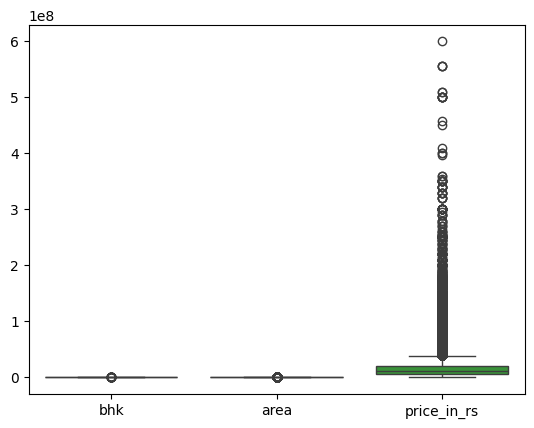

In [98]:
#checking outliers using boxplot
sns.boxplot(df)

In [99]:
#handling Outliers
Q1=np.percentile(df['price_in_rs'],25,interpolation='midpoint')
Q3=np.percentile(df['price_in_rs'],75,interpolation='midpoint')
IQR=Q3-Q1

In [100]:
lb=Q1-1.5*IQR    #lowerbound
ub=Q3+1.5*IQR    #upperbound

In [101]:
df=df[(df.price_in_rs < ub)&(df.price_in_rs>lb)]

In [102]:
df.shape

(70374, 4)

In [103]:
#checking for categorical data
cat_col=df.select_dtypes('object').columns.tolist()

In [104]:
cat_col

['age']

In [105]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(sparse_output=False,handle_unknown="ignore")
enc.fit(df[cat_col])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [106]:
encoded_cols=enc.get_feature_names_out(cat_col)

In [107]:
encoded_cols

array(['age_New', 'age_Resale', 'age_Unknown'], dtype=object)

In [108]:
df[encoded_cols]=enc.transform(df[cat_col])

In [109]:
df.drop(columns=cat_col,inplace=True)

In [110]:
df

,bhk,area,price_in_rs,age_New,age_Resale,age_Unknown
0,3,685,25000000.0,1.0,0.0,0.0
1,2,640,5251000.0,1.0,0.0,0.0
2,2,610,17300000.0,1.0,0.0,0.0
3,2,876,5998000.0,1.0,0.0,0.0
4,2,659,9411000.0,1.0,0.0,0.0
...,...,...,...,...,...,...
76026,2,519,12000000.0,1.0,0.0,0.0
76027,3,1115,15200000.0,1.0,0.0,0.0
76028,2,639,8747000.0,1.0,0.0,0.0
76029,2,550,7526000.0,1.0,0.0,0.0


In [111]:
#seperating target variable
X=df.drop(columns='price_in_rs')
y=df['price_in_rs']

In [112]:
X

,bhk,area,age_New,age_Resale,age_Unknown
0,3,685,1.0,0.0,0.0
1,2,640,1.0,0.0,0.0
2,2,610,1.0,0.0,0.0
3,2,876,1.0,0.0,0.0
4,2,659,1.0,0.0,0.0
...,...,...,...,...,...
76026,2,519,1.0,0.0,0.0
76027,3,1115,1.0,0.0,0.0
76028,2,639,1.0,0.0,0.0
76029,2,550,1.0,0.0,0.0


In [113]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [114]:
X[:]=scaler.transform(X)    #to store data in dataframe

In [115]:
X

,bhk,area,age_New,age_Resale,age_Unknown
0,0.4,0.087557,1.0,0.0,0.0
1,0.2,0.080496,1.0,0.0,0.0
2,0.2,0.075788,1.0,0.0,0.0
3,0.2,0.117527,1.0,0.0,0.0
4,0.2,0.083477,1.0,0.0,0.0
...,...,...,...,...,...
76026,0.2,0.061509,1.0,0.0,0.0
76027,0.4,0.155029,1.0,0.0,0.0
76028,0.2,0.080339,1.0,0.0,0.0
76029,0.2,0.066374,1.0,0.0,0.0


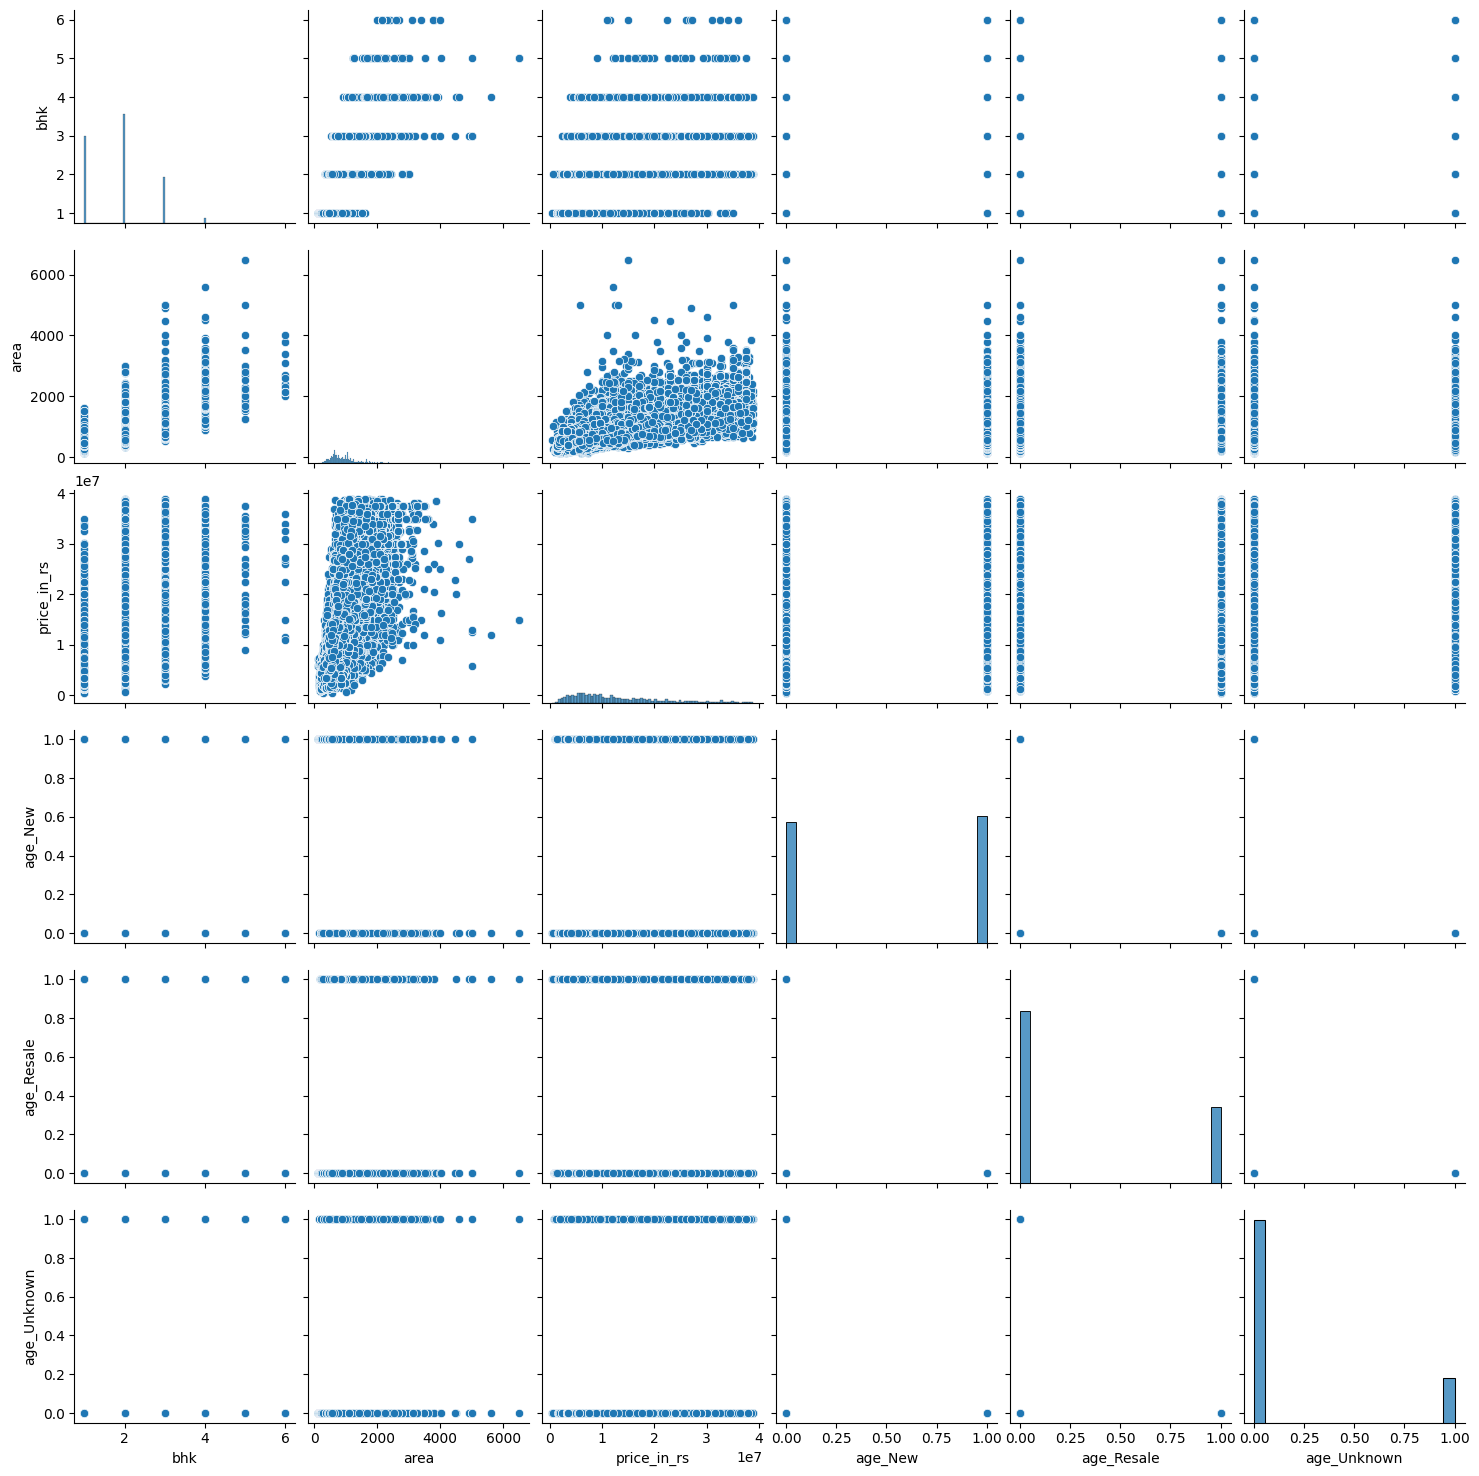

In [116]:
sns.pairplot(df)

In [117]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [118]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((56299, 5), (14075, 5), (56299,), (14075,))

In [119]:
#implementing linear regression model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [120]:
y_pred=model.predict(X_test)

In [121]:
y_test[:5]

30473    30000000.0
45133    11500000.0
23220     8800000.0
52206     4422000.0
66667    10500000.0
Name: price_in_rs, dtype: float64

In [122]:
y_pred[:5]

array([13306624., 20841216., 13978624.,  6332416.,  6433536.])

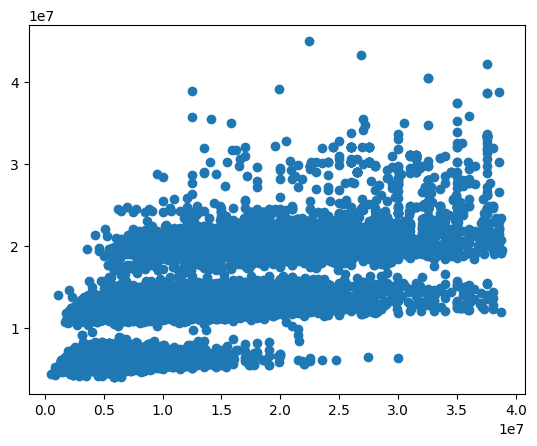

In [123]:
plt.scatter(y_test,y_pred)

<Axes: xlabel='price_in_rs', ylabel='Density'>

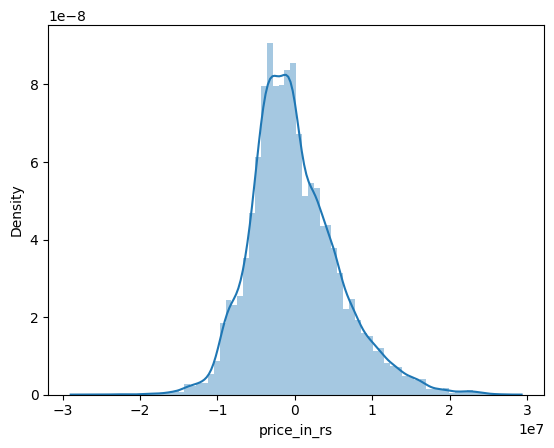

In [124]:
sns.distplot((y_test-y_pred),bins=70)

In [125]:
from sklearn.metrics import mean_absolute_error,r2_score

In [126]:
mean_absolute_error(y_test,y_pred)                  #calculating error

np.float64(4401965.983943162)

In [127]:
from sklearn.linear_model import Lasso
lasso_model=Lasso(alpha=60,max_iter=1000,tol=0.1)
lasso_model.fit(X_train,y_train)

Lasso(alpha=60, tol=0.1)

In [128]:
lasso_pred=lasso_model.predict(X_test)

In [129]:
mean_absolute_error(y_test,lasso_pred)

np.float64(4401888.372977764)

In [130]:
from sklearn.linear_model import Ridge
ridge_model=Ridge(alpha=60,max_iter=1000,tol=0.1)
ridge_model.fit(X_train,y_train)

Ridge(alpha=60, max_iter=1000, tol=0.1)

In [131]:
ridge_pred=ridge_model.predict(X_test)
mean_absolute_error(y_test,ridge_pred)

np.float64(4407653.704427794)

In [138]:
r2=r2_score(y_test,lasso_pred)

In [139]:
r2

0.5213759219105187